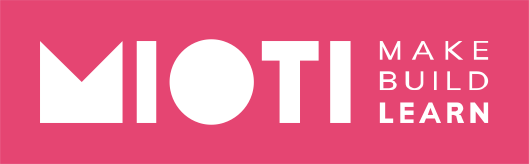
# <center style="color:#888">Módulo Data Science in IoT <br/>Asignatura Estadística</center>#

# Estadística para DS - 2020
# Worksheet Sesión 1


# Estadística

Es el conjunto de métodos y procedimientos que implican recopilación, presentación, ordenación
y análisis de datos, con el fin que a partir de ellos puedan inferirse conclusiones.
Pueden distinguirse dos ramas diferentes en Estadística:
- Estadística Descriptiva, la cual es la que se utiliza en la descripción y análisis de conjuntos de
datos o población.
- Inferencia Estadística, la cual hace posible la estimación de una característica de una
población, a partir de una muestra

Todo análisis estadístico se inicia con una primera fase  de **análisis descriptivo** de los datos. 
Ésta tiene por objeto sintetizar la información mediante la elaboración de:  

* Tablas de frecuencias  
* El cálculo de medidas estadísticas (o estadísticos) y   
* Representaciones gráficas.  

Estos procedimientos descriptivos dependen de la naturaleza de la variable o atributo que se analiza.  
Así mismo, diferenciaremos entre los procedimientos descriptivos que hacen referencia al análisis de una sola variable (análisis unidimensional) de los relativos a dos o más variables conjuntamente (análisis bidimensional o multidimensional).  

Una vez utilizados los datos de la estadística descriptiva , la **estadística inferencial** estudia, basándose en el cálculo de probabilidades,  cómo sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad o significación de los resultados obtenidos.   
Sus principales herramientas son:  

* El muestreo  
* La estimación de parámetros y   
* El contraste de hipótesis.  


# Tablas de Frecuencia
Las tablas de frecuencia son una herramienta básica que puede usar para explorar datos y tener una idea de las relaciones entre las variables. Una tabla de frecuencia es solo una tabla de datos que muestra los recuentos de una o más variables categóricas.  

Utilizamos en este caso el conjunto de datos meteoritos que muestra:
El número de meteoritos que han caido a la tierra cada año desde 1915 hasta 2015

In [29]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
meteorites=[5,3,0,2,0,3,2,3,6,1,2,1,2,1,3,3,3,5,2,4,4,0,2,3,7,
             12,3,10,9,2,3,7,7,2,3,3,6,2,4,3,5,2,2,4,0,4,2,5,2,
             3,3,6,5,8,3,6,6,0,5,2,2,2,6,3,4,4,2,2,4,7,5,3,3,0,
             2,2,2,1,3,4,2,2,1,1,1,2,1,4,4,3,2,1,4,1,1,1,0,0,2,0]

In [31]:
meteorites=[6,4,1,3,1,4,3,4,7,2,3,2,3,2,4,4,4,6,3,5,5,1,3,4,8,
12,4,11,10,3,4,8,8,3,4,4,7,3,5,4,6,3,3,5,1,5,3,6,3,4,
4,7,6,9,4,7,7,1,6,3,3,3,7,4,5,5,3,3,5,8,6,4,4,1,
3,3,3,2,4,5,3,3,2,2,2,3,2,5,5,4,3,2,5,2,2,2,1,1,3,1]

In [32]:
len(meteorites)

100

In [33]:
years=list(range(1915, 2015))
len(years)

100

In [34]:
data = {'Meteorites':meteorites,'Years':years}

In [35]:
rango = (max(meteorites) - min(meteorites)) 
rango
    

11

In [36]:
# Creamos un dataframe y a cada columna le asignamos un nombre
df_data = pd.DataFrame(data)
# Visualizamos el dataframe
df_data.head()

,Meteorites,Years
0,6,1915
1,4,1916
2,1,1917
3,3,1918
4,1,1919


## Frecuencias absolutas
La frecuencia absoluta de una variable es el número de veces que aparece en la muestra dicho valor de la variable

Lo primero es ver el rango de descubrimientos anuales que tenemos 
Esta tabla sirve para contestar las siguientes preguntas.  
* ¿En qué rango nos estamos moviendo?  
* ¿Cuantos años hay con 12 descubrimientos?  
* ¿Y con 0 descubrimientos?  

Construimos una tablas de frecuencias absolutas para la variable 'discoveries'

In [37]:
df_freq = pd.value_counts(df_data.Meteorites).to_frame().reset_index()
df_freq.columns = ['Meteorites','f_abs']
df_freq=df_freq.sort_values(['Meteorites'])

In [38]:
df_freq = pd.crosstab(index=df_data.Meteorites,  # Make a crosstab
                              columns="f_abs")
df_freq.head(12)


col_0,f_abs
Meteorites,
1,9
2,12
3,26
4,20
5,12
6,7
7,6
8,4
9,1


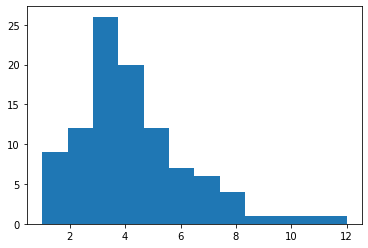

In [39]:
hist, bin_edges = np.histogram(df_data.Meteorites, 12)
plt.hist(df_data.Meteorites, bins=bin_edges)
plt.show()

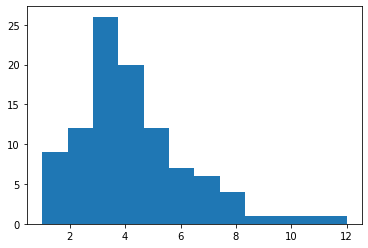

In [40]:
hist, bin_edges = np.histogram(meteorites, 12)
plt.hist(meteorites, bins=bin_edges)
plt.show()

## Frecuencia absoluta acumulada
La frecuencia absoluta acumulada es el resultado de ir sumando las frecuencias absolutas de las observaciones o valores de una población o muestra

In [41]:
df_freq['f_cumabs'] = df_freq['f_abs'].cumsum()


In [42]:
df_freq.head(12)

col_0,f_abs,f_cumabs
Meteorites,,
1,9,9
2,12,21
3,26,47
4,20,67
5,12,79
6,7,86
7,6,92
8,4,96
9,1,97


## Frecuencia Relativa 

La frecuencia relativa es el coeficiente entre la frecuencia absoluta y el tamaño de la muestra.

Esta frecuencia nos permite hacer comparaciones de muestras de distinto tamaño.

Dado que la frecuencia relativa es un coeficiente entre dos números,  la podemos representar como fracción, decimal y porcentaje.

Obtengamos la frecuencia relativa de la muestra anterior:


In [43]:
total=df_freq['f_abs'].sum()

In [44]:
df_freq['f_rel'] = df_freq['f_abs']/total
df_freq['f_cumrel'] = df_freq['f_rel'].cumsum()
df_freq.head(12)

col_0,f_abs,f_cumabs,f_rel,f_cumrel
Meteorites,,,,
1,9,9,0.09,0.09
2,12,21,0.12,0.21
3,26,47,0.26,0.47
4,20,67,0.20,0.67
5,12,79,0.12,0.79
6,7,86,0.07,0.86
7,6,92,0.06,0.92
8,4,96,0.04,0.96
9,1,97,0.01,0.97


# Medidas 

## Medidas de tendencia central ( de posición)
Cálculo de la media muestral, moda y la mediana
¿Cual es la media , la moda y la mediana?  
Para ello utilizamos NumPy , paquete de Python con biblioteca de funciones matemáticas de alto nivel. 

In [45]:
np.mean(meteorites)

4.09

In [46]:
np.median(meteorites)

4.0

In [49]:
from statistics import mode
mode(meteorites)

3

¿Qué significa que la mediana sea igual, mayor o menor que la media?

# Frecuencias cruzadas
Ejemplo: Tenemos la encuesta de satisfacción de cliente de cierta empresa de envios.  
Además de la opinón de los usuarios que ha utilizado nuestros servicios de paquetería, tenemos que transporte eligieron y el tipo de embalaje.


In [51]:
df_envios = pd.read_csv('envio.csv', sep=';',encoding='latin-1')
df_envios.head()

,satisfaccion_cliente,transporte,embalaje
0,Baja,Por Aire,Caja Grande
1,Alta,Por Tierra,Caja Grande
2,Alta,Por Aire,Paquete Pequeño
3,Alta,Por Aire,Paquete Pequeño
4,Alta,Por Aire,Caja Mediana


¿Cual es el porcentaje de clientes que han puntuado “Alta”,“Media” y “Baja” la calidad del servicio?

In [52]:
def freq_simple(df_col):
    col='df_col'.rpartition('.')[2]
    df_freq = pd.crosstab(index=df_col,columns="f_abs")
    df_freq['f_cumabs'] = df_freq['f_abs'].cumsum()
    total=df_freq['f_abs'].sum()
    df_freq['f_rel'] = df_freq['f_abs']/total
    df_freq['f_cumrel'] = df_freq['f_rel'].cumsum()
    return df_freq

In [53]:
df_sc=freq_simple(df_envios.satisfaccion_cliente)
df_sc.head()

col_0,f_abs,f_cumabs,f_rel,f_cumrel
satisfaccion_cliente,,,,
Alta,12,12,0.631579,0.631579
Baja,4,16,0.210526,0.842105
Media,3,19,0.157895,1.000000


En este ejemplo se ve que:
* el **63%** de clientes puntua **"Alta"**   
* el **21%** de clientes puntua **"Baja"** y el  
* el **15%** de clientes puntua **"Media"** 


Utilizando la tabla de frecuencias para saber que transporte utilizan nuestros clientes vemos que: 
    

In [55]:
df_transporte=freq_simple(df_envios.transporte)
df_transporte.head()

col_0,f_abs,f_cumabs,f_rel,f_cumrel
transporte,,,,
Por Aire,16,16,0.842105,0.842105
Por Aire (Exprs),1,17,0.052632,0.894737
Por Tierra,2,19,0.105263,1.000000


* el **84%** de clientes utiliza  **"Por Aire"**   
* el **0.5%** de clientes utiliza  **"Por Aire(Exprs)"** y el  
* el **10.5%** de clientes utiliza  **"Por Tierra"** 

La pregunta que nos sugiere estas dos tablas de frecuencia es:   
¿Es la misma calidad de servicio en los tres tipos de transporte ?

Para contestar la pregunta utilizamos la frecuencia cruzada. 

In [56]:

df_freqc=pd.crosstab(index=df_envios.satisfaccion_cliente,columns=df_envios.transporte,margins=True)
# Añadimos margins=True
# Añadimos normalize Columns 
#mar
df_freqc.head()

transporte,Por Aire,Por Aire (Exprs),Por Tierra,All
satisfaccion_cliente,,,,
Alta,10,1,1,12
Baja,3,0,1,4
Media,3,0,0,3
All,16,1,2,19


In [57]:
df_freqc=pd.crosstab(index=df_envios.satisfaccion_cliente,columns=df_envios.transporte,margins=True,normalize=True)
df_freqc.head()

transporte,Por Aire,Por Aire (Exprs),Por Tierra,All
satisfaccion_cliente,,,,
Alta,0.526316,0.052632,0.052632,0.631579
Baja,0.157895,0.000000,0.052632,0.210526
Media,0.157895,0.000000,0.000000,0.157895
All,0.842105,0.052632,0.105263,1.000000


In [58]:
df_freqc=pd.crosstab(index=df_envios.satisfaccion_cliente,columns=df_envios.transporte,margins=True,normalize='columns')
df_freqc.head()

transporte,Por Aire,Por Aire (Exprs),Por Tierra,All
satisfaccion_cliente,,,,
Alta,0.6250,1.0,0.5,0.631579
Baja,0.1875,0.0,0.5,0.210526
Media,0.1875,0.0,0.0,0.157895


In [59]:
df_freqc=pd.crosstab(index=df_envios.satisfaccion_cliente,columns=df_envios.transporte,margins=True,normalize='index')
df_freqc.head()

transporte,Por Aire,Por Aire (Exprs),Por Tierra
satisfaccion_cliente,,,
Alta,0.833333,0.083333,0.083333
Baja,0.750000,0.000000,0.250000
Media,1.000000,0.000000,0.000000
All,0.842105,0.052632,0.105263
